### PostgreSQL Joins
1. used to combine records from two or more tables from a database

#### Types of Joins in a Table
* The INNER JOIN
* The LEFT JOIN
* The RIGHT JOIN
* The FULL OUTER JOIN

#### Some special types of joins:
* Natural Join
* Cross Join
* Self Join

In [18]:
# import necessary library

import psycopg2
#import library pandas
import pandas as pd
#import library sqlio
import pandas.io.sql as sqlio

#create database connection variable 
conn = psycopg2.connect(user="postgres", password="root1234", host="localhost", database="DVDRental")

CREATE TABLE basket_a (
    a INT PRIMARY KEY,
    fruit_a VARCHAR (100) NOT NULL
);

CREATE TABLE basket_b (
    b INT PRIMARY KEY,
    fruit_b VARCHAR (100) NOT NULL
);

INSERT INTO basket_a (a, fruit_a)
VALUES
    (1, 'Apple'),
    (2, 'Orange'),
    (3, 'Banana'),
    (4, 'Cucumber');

INSERT INTO basket_b (b, fruit_b)
VALUES
    (1, 'Orange'),
    (2, 'Apple'),
    (3, 'Watermelon'),
    (4, 'Pear');
    

In [5]:
query = """select * from basket_a;"""   # display all rows from the table basket_a 
sqlio.read_sql_query(query,conn)

,a,fruit_a
0,1,Apple
1,2,Orange
2,3,Banana
3,4,Cucumber


In [19]:
query = """select * from basket_b;"""  # display all rows from the table basket_b 
sqlio.read_sql_query(query,conn)

,b,fruit_b
0,1,Orange
1,2,Apple
2,3,Watermelon
3,4,Pear


### Inner join
1. most common type of join
2. It returns all matching rows from multiple tables when the join condition is satisfied

#### Venn Diagram of Inner Join
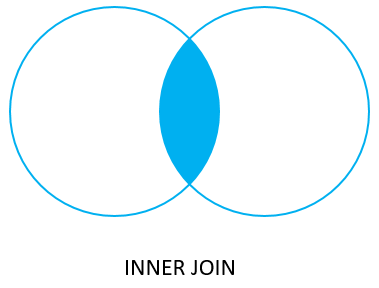

In [20]:
query1 = """select a, fruit_a, b, fruit_b
            from basket_a
            INNER JOIN basket_b
            ON fruit_a = fruit_b""";
sqlio.read_sql_query(query,conn)

,b,fruit_b
0,1,Orange
1,2,Apple
2,3,Watermelon
3,4,Pear


### Left join
 1. retrieves all rows from the left table and all matching rows from the right table
 2. LEFT JOIN clause is used to select rows from one table that may or may not have corresponding rows in other tables.

#### Venn Diagram of Left Join
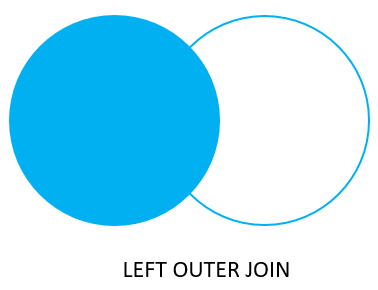

In [21]:
query = """select a, fruit_a, b, fruit_b
            from basket_a
            LEFT JOIN basket_b 
            ON fruit_a = fruit_b""";
sqlio.read_sql_query(query,conn)

,a,fruit_a,b,fruit_b
0,1,Apple,2.0,Apple
1,2,Orange,1.0,Orange
2,3,Banana,NaN,None
3,4,Cucumber,NaN,None


### Left outer join 
1. Select rows from the left table that do not have matching rows in the right table, 
2. Use the left join with a WHERE clause. 

In [22]:
query = """select a, fruit_a, b, fruit_b
            from basket_a
            LEFT JOIN basket_b 
            ON fruit_a = fruit_b
            WHERE b IS NULL;"""
sqlio.read_sql_query(query,conn)

,a,fruit_a,b,fruit_b
0,3,Banana,None,None
1,4,Cucumber,None,None


### Right join
1. retrieves all rows from the right table and all matching rows from the left table

### Venn Diagram of Right Join
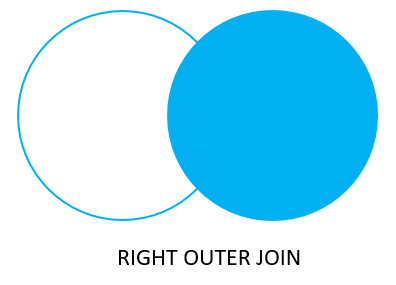

In [23]:
query = """select a, fruit_a, b, fruit_b
           from basket_a
           RIGHT JOIN basket_b ON fruit_a = fruit_b;"""
sqlio.read_sql_query(query,conn)

,a,fruit_a,b,fruit_b
0,2.0,Orange,1,Orange
1,1.0,Apple,2,Apple
2,NaN,None,3,Watermelon
3,NaN,None,4,Pear


### Right outer join 
1. Select rows from the Right table that do not have matching rows in the Left table, 
2. Use the Right join with a WHERE clause. 

In [24]:
query = """select a, fruit_a, b, fruit_b
            from basket_a
            RIGHT JOIN basket_b 
            ON fruit_a = fruit_b
            WHERE a IS NULL;"""
sqlio.read_sql_query(query,conn)

,a,fruit_a,b,fruit_b
0,None,None,3,Watermelon
1,None,None,4,Pear


### Full outer join 
1. Returns all rows from the left table as well as the right table.
2. While joining the table using FULL OUTER JOIN first, it will join using an inner join

#### Venn Diagram of Full Outer Join
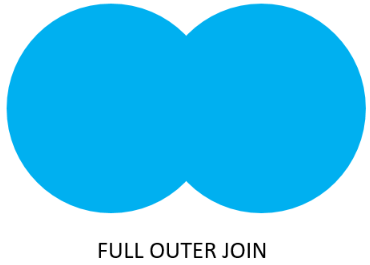

In [25]:
query = """select a, fruit_a, b, fruit_b
            from basket_a
            FULL OUTER JOIN basket_b 
            ON fruit_a = fruit_b;"""
sqlio.read_sql_query(query,conn)

,a,fruit_a,b,fruit_b
0,1.0,Apple,2.0,Apple
1,2.0,Orange,1.0,Orange
2,3.0,Banana,NaN,None
3,4.0,Cucumber,NaN,None
4,NaN,None,3.0,Watermelon
5,NaN,None,4.0,Pear


### Self join
1. self-join is a regular join that joins a table to itself using the  INNER JOIN or LEFT JOIN 

Write a query to find all pairs of films that have the same length

In [16]:
query = """select f1.title, f2.title, f1.length
            from film f1
            INNER JOIN film f2 
            ON f1.film_id <> f2.film_id AND  f1.length = f2.length 
            LIMIT 5;"""
sqlio.read_sql_query(query,conn)

,title,title,length
0,Chamber Italian,Affair Prejudice,117
1,Chamber Italian,Graffiti Love,117
2,Chamber Italian,Magic Mallrats,117
3,Chamber Italian,Resurrection Silverado,117
4,Grosse Wonderful,Doors President,49


### Cross Join
1. allows to produce a cartesian product of rows in two or more tables
2. does not have a join predicate

#### Syntex <br>
SELECT select_list <br>
FROM T1<br>
CROSS JOIN T2;

**If T1 has n rows and T2 has m rows,  the result set will have nxm rows. For example, the T1 has 1,000 rows and T2 has 1,000 rows, the result set will have 1,000 x 1,000 = 1,000,000 rows**


### Natural Join
1. Creates an implicit join based on the same column names in the joined tables

#### Syntex <br>
SELECT select_list <br>
FROM T1 <br>
NATURAL [INNER, LEFT, RIGHT] JOIN T2; 

In [26]:
query1 = """SELECT * FROM products
            NATURAL JOIN categories;"""
sqlio.read_sql_query(query,conn)

,a,fruit_a,b,fruit_b
0,1.0,Apple,2.0,Apple
1,2.0,Orange,1.0,Orange
2,3.0,Banana,NaN,None
3,4.0,Cucumber,NaN,None
4,NaN,None,3.0,Watermelon
5,NaN,None,4.0,Pear


NATURAL JOIN convenience: It does not require you to specify the join clause because it uses an implicit join clause based on the common column.